# <center>Trabajo Semanal 2</center>
### <center> Autor: Arturo Huber </center>

## Introducción teórica
En este trabajo abordaremos el tema de los Sistemas Lineales e Invariantes en el Tiempo - Sistemas LTI, su caracterización y su simulación mediante Python. Para ello, vamos a utilizar los siguientes fundamentos teóricos.

**Sistemas LTI**

Un sistema lineal e invariante en el tiempo (LTI) es aquel que cumple dos propiedades fundamentales:<br>
*Linealidad*:  La salida ante una combinación lineal de entradas es igual a la misma combinación lineal de las salidas individuales.

$$
x[n] = a·x1[n] + b·x2[n]  ->  y[n] = a·y1[n] + b·y2[n]
$$

*Invarianza en el tiempo*: Si la entrada se desplaza en el tiempo, la salida se desplaza en la misma cantidad sin cambiar su forma.

$$
x[n−n_0]⇒y[n−n_0]
$$


**Ecuaciones en diferencias**

En el caso discreto, los sistemas LTI  se pueden describir mediante ecuaciones en diferencias lineales con coeficientes constantes.

De forma general:

$$
\sum_{k=0}^{N} a_k \, y[n-k] \;=\; \sum_{m=0}^{M} b_m \, x[n-m]
$$

Donde:
* Los términos de la derecha (dependientes de la entrada) representan la parte forzada del sistema.
* Los términos de la izquierda (dependientes de salidas pasadas) representan la parte natural o transitoria.

Existen dos clases principales de sistemas:
* **FIR** (Finite Impulse Response): solo de entradas presentes y/o pasadas.
* **IIR** (Infinite Impulse Response): incluyen salidas pasadas (realimentación), por lo que la respuesta nunca se anula.

**Respuesta al impulso**

La respuesta al impulso $h[n]$ se obtiene aplicando como entrada un impulso unitario:
$$
x[n]=δ[n]⇒y[n]=h[n]
$$

Las propiedades de *linealidad* e *Invarianza en el tiempo*, nos permiten caracterizar los sistemas LTI mediante su respuesta al impulso. Es decir, conociendo $h[n]$, se puede obtener la salida para cualquier señal de entrada mediante la operación de convolución con la respuesta al impulso. Por lo que:

$$
y[n] = x[n] * h[n]
$$

Siendo:
* $y[n]$: La salida del sistema
* $x[n]$: La señal de entrada al sistema
* $h[n]$: La respuesta al impulso

## Análisis y Desarrollo

**Punto 1**

Para la realización del primer punto, se importan las señales del primer trabajo semanal. Las señales son:
* La señal *Original* : Señal senoidal de amplitud: 1, frecuencia: 2KHz, fase: 0
* La señal *Amplificada y desafazada*: Señal senoidal de amplitud: 2, frecuencia: 2KHz, fase: $\pi/2$
* La señal *Modulada* : La señal *Original* modulada con otra senoidal de la mitad de la frecuencia
* La señal *Modulada y Recortada* : La señal anterior recortada al 75% de su amplitud maxima
* La señal *Cuadrada*: Señal cuadrada de amplitud 1 y frecuencia de 4KHz
* La señal *Pulso*: Un pulso de 10ms de amplitud uno

Para calcular la salida de las señales del siguiente sistema LTI:

$$
y[n]=3⋅10−2⋅x[n]+5⋅10−2⋅x[n−1]+3⋅10−2⋅x[n−2]+1.5⋅y[n−1]−0.5⋅y[n−2]
$$

Se programa la siguiente función:

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from TS1 import Original, y2, s_am, s_clip, sq, pulso, fs

def sistema_lti(x, nombre, potencia):
    """
    Resuelve
    y[n] = 0.03 x[n] + 0.05 x[n-1] + 0.03 x[n-2] + 1.5 y[n-1] - 0.5 y[n-2]

    Parámetros
    ----------
    x :  Vector
        Señal de entrada x[n] 
    
    Returns
    -------
    y : Vector
        Señal de salida y[n]
    """
    Ts = 1/fs
    N = len(x)
    t = np.arange(N) * Ts
    y = np.zeros(N, dtype=float)

    for n in range(N):
        
        # Si los coeficientes son negativos, el resultado es 0        
        if n-1 >= 0:
            x1 = x[n-1]
            y1 = y[n-1]
        else:
            x1 = 0.0
            y1 = 0.0

        if n-2 >= 0:
            x2 = x[n-2]
            y2 = y[n-2]
        else:
            x2 = 0.0
            y2 = 0.0

        # Calculo
        y[n] = 0.03*x[n] + 0.05*x1 + 0.03*x2 + 1.5*y1 - 0.5*y2
        
    # Grafico
    plt.figure(figsize=(10,5))
    plt.plot(t, y, label="Salida")
    plt.title(f"Respuesta a la señal {nombre}")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    if (potencia):
        print(f"Potencia de la señal {nombre} = {np.mean(y**2):.3f}")
    else:
        print(f"Energia de la señal {nombre} = {np.sum(y**2)* Ts:.3f}")

    return y

Y graficamos las salidas

Para las simulaciones se toma un fs = 50000 y una duracion de 0.01 



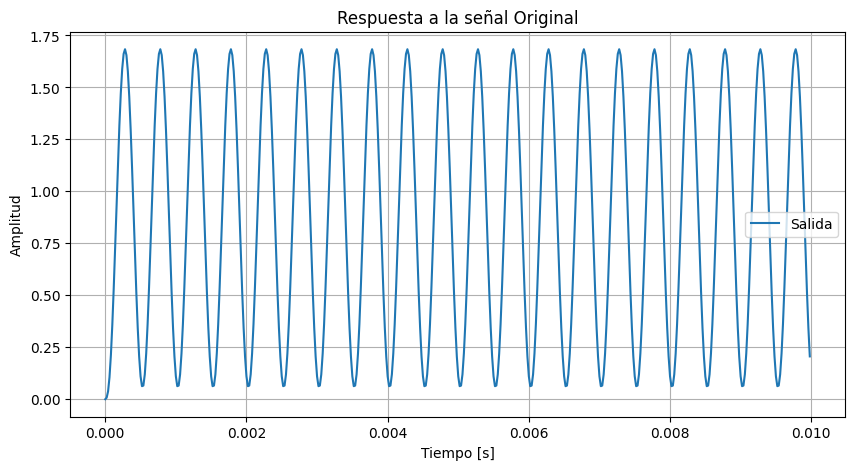

Potencia de la señal Original = 1.089


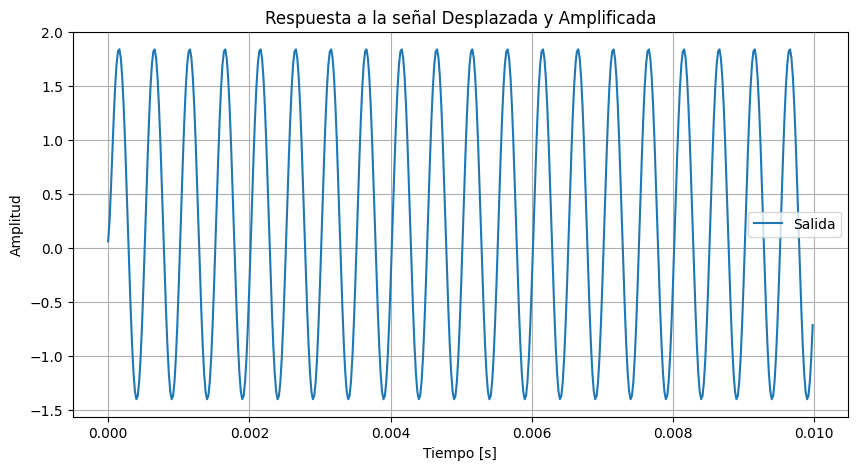

Potencia de la señal Desplazada y Amplificada = 1.371


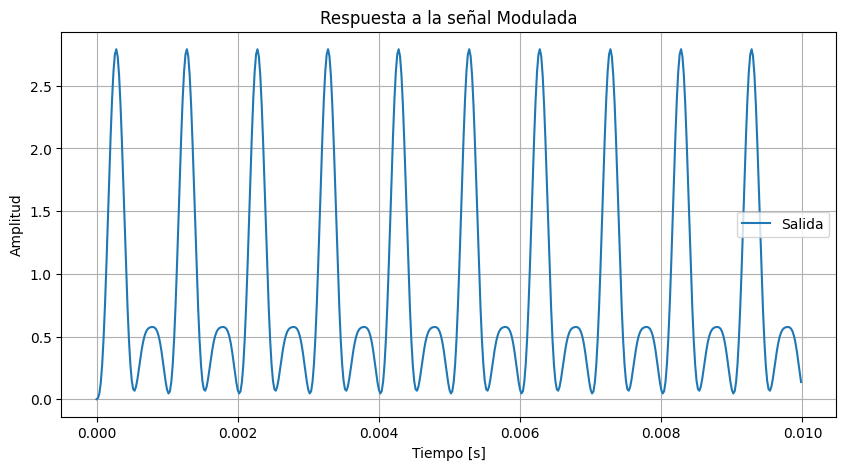

Potencia de la señal Modulada = 1.488


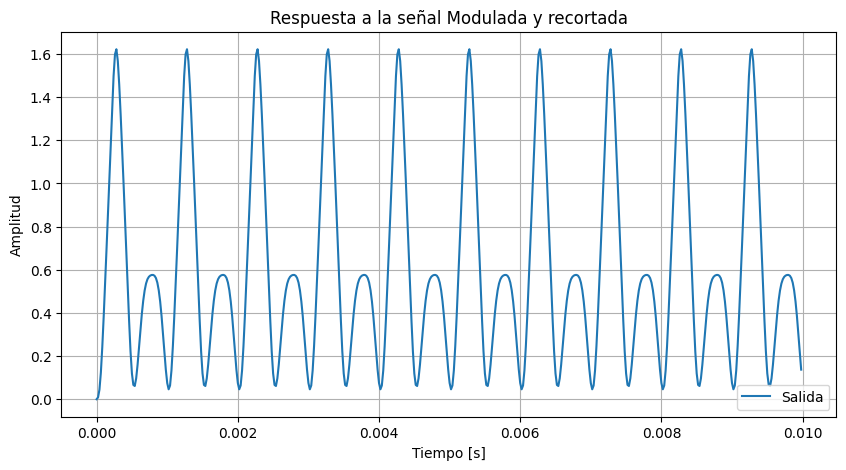

Potencia de la señal Modulada y recortada = 0.565


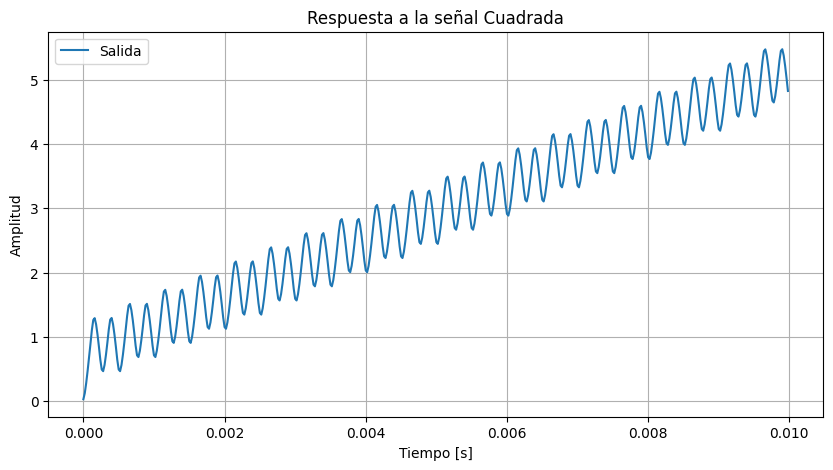

Potencia de la señal Cuadrada = 10.280


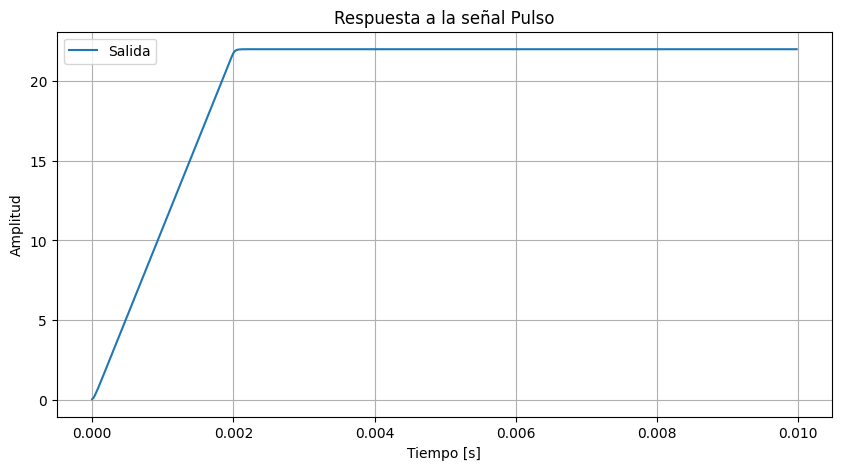

Energia de la señal Pulso = 4.180


In [78]:
N = 500         
print(f"Para las simulaciones se toma un fs = {fs} y una duracion de {N/fs:.2f} \n")
y = sistema_lti(Original, "Original", potencia = True)                      # Senoidal f: 2KHz A:1 fase :0
y = sistema_lti(y2, "Desplazada y Amplificada", potencia = True)            # Senoidal f: 2KHz A:2 fase :p1/2
y = sistema_lti(s_am, "Modulada", potencia = True)                          # Señal original modulada
y = sistema_lti(s_clip, "Modulada y recortada", potencia = True)            # Señal anterior recortada
y = sistema_lti(sq, "Cuadrada", potencia = True)                            # Cuadrada f: 4KHz A:1
y = sistema_lti(pulso, "Pulso", potencia = False)                           # Pulso de 10ms


Luego, calculamos la respuesta al impulso del sistema y calculamos la salida mediante el calculo de la convolución de la señal de entrada y la respuesta al impulso y comparamos los resultados obtenidos.

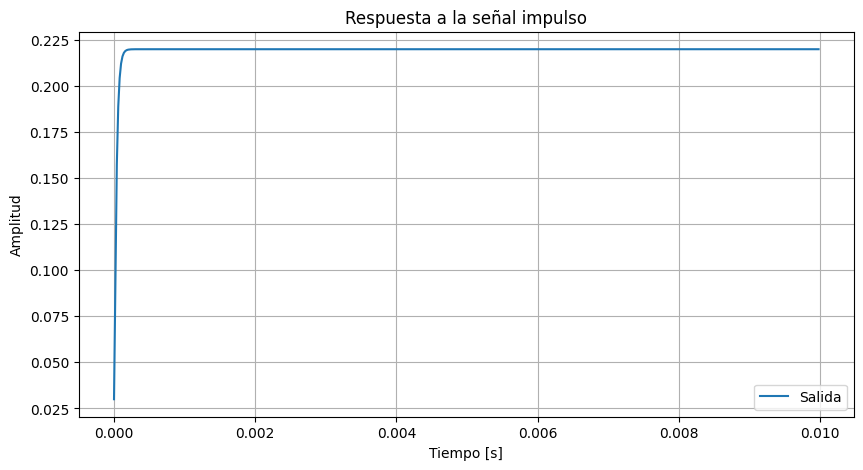

Potencia de la señal impulso = 0.048


In [79]:
# Generar la señal impulso y su respuesta

impulso = np.zeros(N)
impulso[0] = 1 

h = sistema_lti(impulso, "impulso", potencia = True)                    # h: respuesta al impulso

Creamos la siguiente función para graficar la salida mediante el cálculo de la convolución y calculamos la potencia hasta el tiempo t = 0.01s para poder compararlos con las señales anteriores.

In [80]:
def convolucion(x, h, nombre, potencia):
    """
    Calcula la respuesta a traves de la convolucion con h

    Parameters
    ----------
    x : Vector
        Señal de entrada
    h : Vector
        Respuesta al impulso

    Returns
    -------
    None.

    """
    y = np.convolve(x, h)
    
    Ts = 1/fs
    N = len(y)
    t = np.arange(N) * Ts
    
        
    # Grafico
    plt.figure(figsize=(10,5))
    plt.plot(t, y, label="Salida")
    plt.axvline(x=0.01, color = 'black', linestyle='--', label='s = 0.01')
    plt.title(f"Salida de la señal {nombre} mediante convolución")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    if (potencia):
        print(f"Potencia de la señal {nombre} = {np.mean(y[:500]**2):.3f}")
    else:
        print(f"Energia de la señal {nombre} = {np.sum(y[:500]**2)* Ts:.3f}")
    


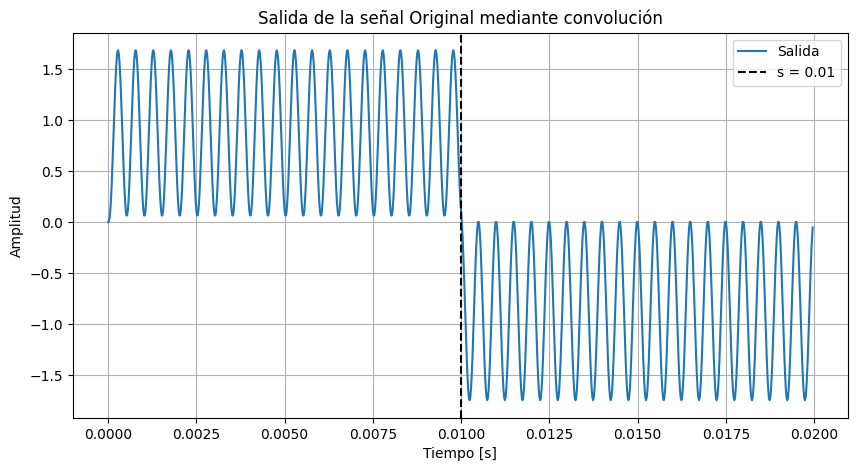

Potencia de la señal Original = 1.089


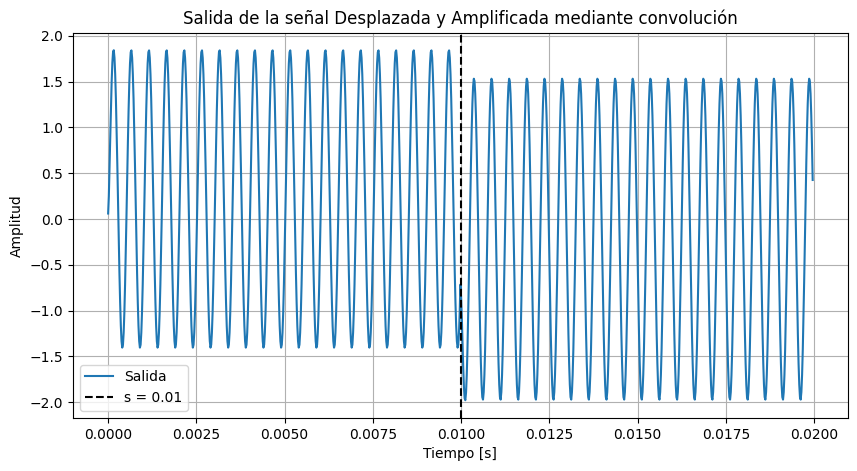

Potencia de la señal Desplazada y Amplificada = 1.371


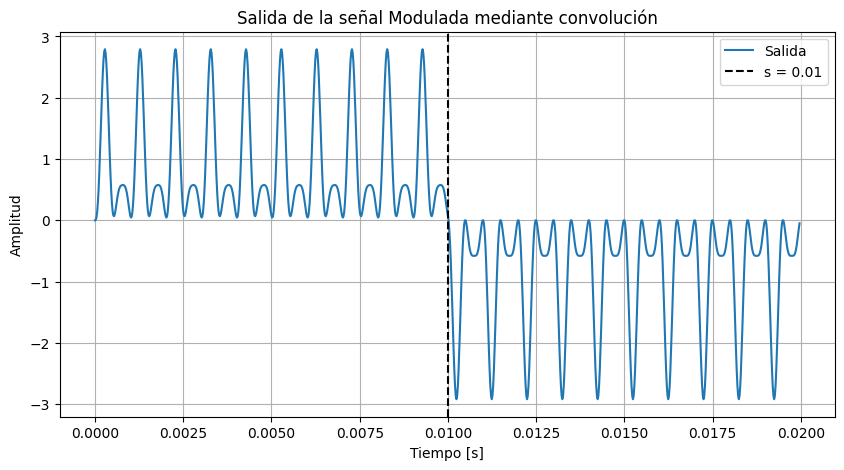

Potencia de la señal Modulada = 1.488


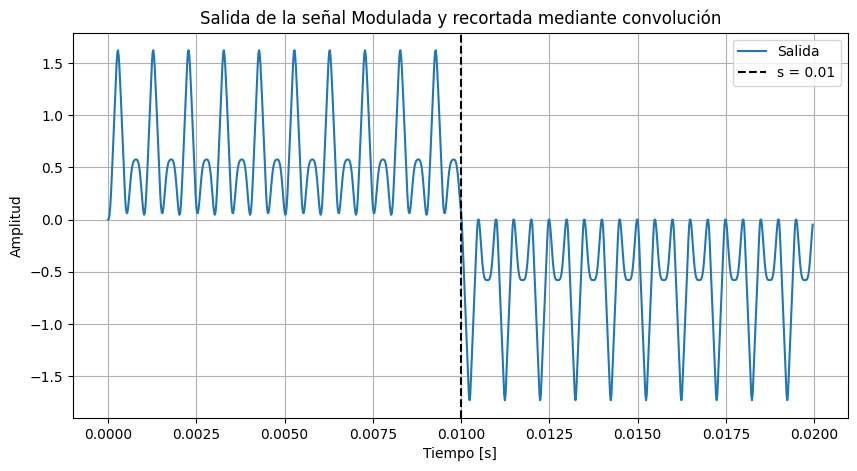

Potencia de la señal Modulada y recortada = 0.565


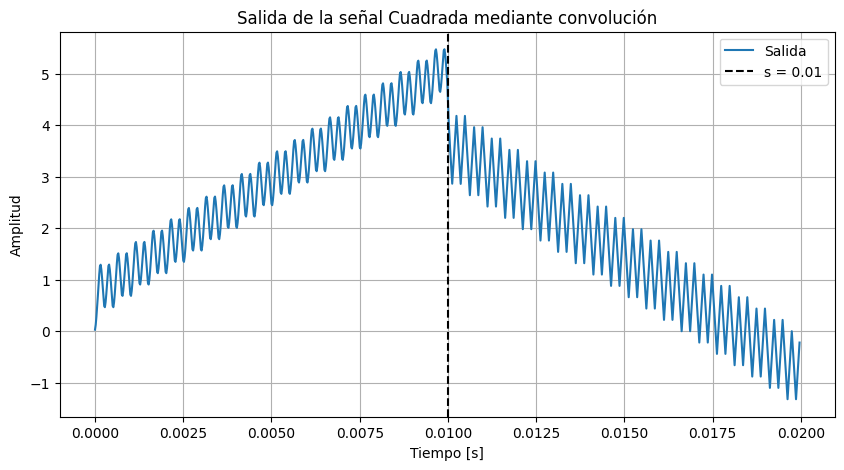

Potencia de la señal Cuadrada = 10.280


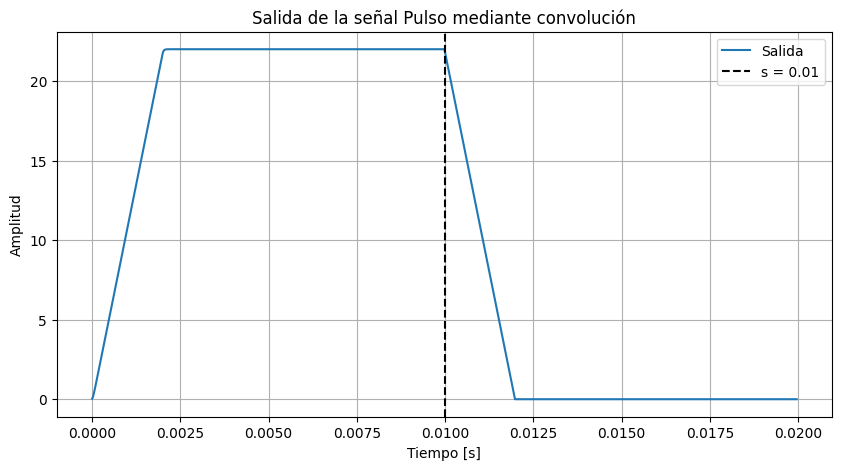

Energia de la señal Pulso = 4.180


In [81]:
convolucion(Original, h, "Original", potencia = True)                   # Senoidal f: 2KHz A:1 fase :0
convolucion(y2, h, "Desplazada y Amplificada", potencia = True)         # Senoidal f: 2KHz A:2 fase :p1/2
convolucion(s_am, h, "Modulada", potencia = True)                       # Señal original modulada
convolucion(s_clip, h, "Modulada y recortada", potencia = True)         # Señal anterior recortada
convolucion(sq, h, "Cuadrada", potencia = True)                         # Cuadrada f: 4KHz A:1
convolucion(pulso, h, "Pulso", potencia = False)                        # Pulso de 10ms

Cuando se comparan las respuestas obtenidas por ambos métodos, se observa que hasta los 0.01 s ambas salidas coinciden perfectamente. Esto ocurre porque, en ese intervalo, la respuesta al impulso actúa completamente sobre la señal de entrada y la convolución refleja exactamente la misma acumulación que la ecuación en diferencias.

Como se aprecia en su gráfico, el transitorio de la respuesta al impulso es prácticamente instantáneo y luego se estabiliza en un valor constante. Por este motivo, desde que comienza el solapamiento con la señal de entrada ya se obtienen respuestas válidas que representan correctamente el comportamiento del sistema.

Una vez transcurridos los 0.01 s, la señal de entrada termina y la convolución se realiza únicamente con sus restos parciales. En consecuencia, la salida comienza a decrecer progresivamente porque cada vez hay menos solapamiento entre la entrada y la respuesta al impulso.

Este proceso finaliza cuando ya no existe ningún solapamiento, es decir, cuando el pulso desplazado ha salido completamente de la ventana de convolución. Así, dado que tanto la entrada como la respuesta al impulso duran 0.01 s, la salida resultante tiene una duración total de 0.02 s.

**Punto 2** : Hallar la respuesta al impulso y la salida correspondiente a una señal de entrada senoidal en los sistemas definidos mediante las siguientes ecuaciones en diferencias:

$$
y[n]=x[n]+3⋅x[n−10]
$$
$$
y[n]=x[n]+3⋅y[n−10]
$$

Como primera observación, podemos ver que la primera ecuación no tiene realimentación, su respuesta depende unicamente de la señal de entrada, ya sea el valor actual o pasado, mientras que en la segunda la salida también depende de salidas anteriores.

Calculamos y graficamos la respuesta al im, con la siguiente función.

In [82]:
def punto2(x, impulso):
    """   
    Hallar la respuesta al impulso y la salida de una senoidal de los sistemas definidos
    mediante las siguientes ecuaciones en diferencias:
    
    primera ecuacion : y[n] =  x[n] + 3 x[n-10]
    segunda ecuacion : y[n] =  x[n] + 3 y[n-10]
        
    Parameters
    ----------
    x : Vector
        Señal de entrada (senoidal)
    impulso : Vector
        Señal del impulso

    Returns
    -------
    None.

    """

    N = len(impulso)
    Ts = 1/fs
    t = np.arange(N) * Ts
    h1 = np.zeros(N, dtype=float)       # h1 : respuesta al impulso de la primera ecuacion
    h2 = np.zeros(N, dtype=float)       # h2 : respuesta al impulso de la segunda ecuacion
    y1 = np.zeros(N, dtype=float)       # y1 : respuesta de la señal senoidal de la primera ecuacion
    y2 = np.zeros(N, dtype=float)       # y2 : respuesta de la señal senoidal de la segunda ecuacion
    
    
    # Calcular las salidas del impulso (h1 y h2) y de la senoidal (y1 e y2) de la primera ecuacion
    for n in range (N):
    
        h1[n] = impulso[n]                  # Primera ecuación
        y1[n] = x[n]                        
        
        h2[n] = impulso[n]                  # Segunda ecuación
        y2[n] = x[n]
        
        if (n-10) >= 0:
            h1[n] += 3 * impulso[n-10]      # Primera ecuación
            y1[n] += 3 * x[n-10]
            
            h2[n] += 3* h2[n-10]           # Sefgunda ecuación
            y2[n] += 3* y2[n-10]
    


    # Grafico
    plt.figure(figsize=(10,5))
    plt.plot(t*1000, h1, label="Respuesta al impulso de la primer ecuacion")
    plt.plot(t*1000, y1, label="Respuesta de la señal senoidal la primer ecuacion")
    plt.title("Respuestas de la primera ecuacion")
    plt.xlabel("Tiempo [ms]")
    plt.xlim((0,2))
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.legend()
    plt.show()        

    # Grafico
    plt.figure(figsize=(10,5))
    plt.plot(t, h2,'.', label="Respuesta al impulso de la segunda ecuacion")
    plt.plot(t, y2, label="Respuesta de la señal senoidal la segunda ecuacion")
    plt.title("Respuestas de la segunda ecuacion")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.yscale('log')
   # plt.xlim((0,0.002))
    plt.grid(True)
    plt.legend()
    plt.show()      

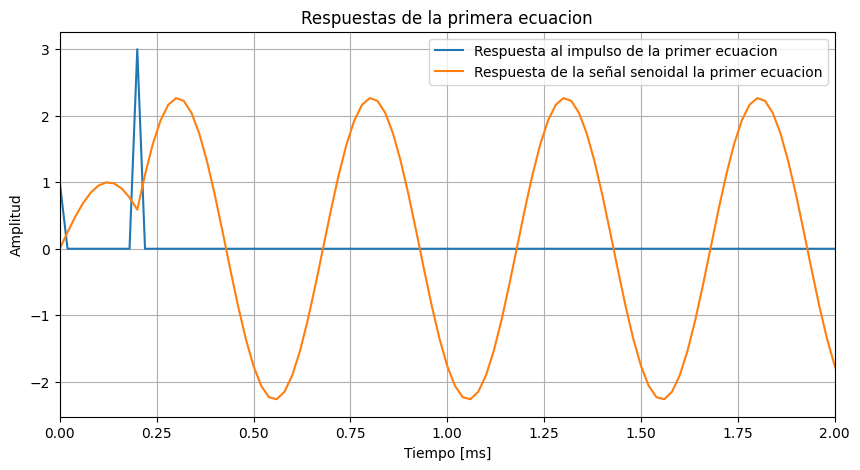

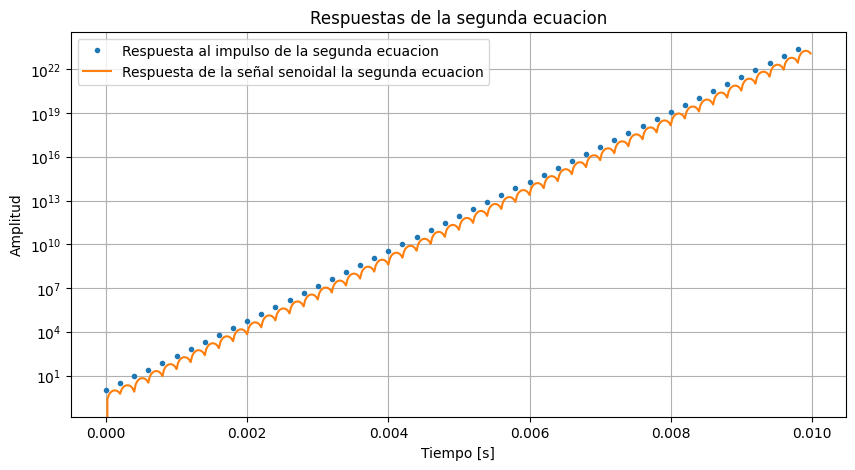

In [83]:
punto2(Original, impulso)                              # Original: Senoidal f: 2KHz A:1 fase :0

Como habiamos observado, en la primera ecuación la salida depende unicamente de la entrada, por lo que tiene sentido que cuando la entrada sea finita (impulso), la salida también lo sea. Y cuando la entrada sea periodica, la salida también lo sea.

En la segunda ecuación, vemos que toma valores muy altos rapidamente. Trabajamos un poco más con la ecuación en diferencias:

Desarrollo itereativo:

$$
y[n]=x[n]+3y[n−10]
$$
$$
y[n]=x[n]+3(x[n−10]+3y[n−20])
$$
$$
y[n]=x[n]+3x[n−10]+3^2y[n−20]
$$
$$
y[n]=x[n]+3x[n−10]+3^2x[n−20]+3^3y[n−30]
$$

Podemos reescribirlo como una suma infinita:

$$
y[n] = \sum_{k=0}^{\infty} 3^k\,x[n-10k]
$$

Observamos que esta suma infinita de terminos positivos crece exponencialmente por el coeficiente $3^k$, independientemente de la entrada por lo que tiene sentido que tanto la respuesta al impuslo como a la senoidal se comporten de manera similar y tomen valores muy altos en pocas muestras.

## Conclusiones

En este trabajo se analizaron distintas formas de caracterizar sistemas LTI, tanto mediante su ecuación en diferencias como a partir de su respuesta al impulso. Se comprobó que ambos metodos son validas y permiten obtener la salida del sistema para una entrada determinada. Sin embargo, es importante destacar que, al calcular la salida mediante convolución, la señal resultante se extiende en el tiempo más que la entrada original. Esto ocurre porque, a medida que la respuesta al impulso se desplaza sobre la señal de entrada, se producen solapamientos parciales, al inicio la superposición es mínima, luego alcanza una coincidencia completa y finalmente vuelve a reducirse hasta desaparecer. En este sentido, hay que tener en cuenta que, únicamente durante el intervalo en el que el solapamiento es completo la salida refleja de manera válida la interacción total entre la entrada y el sistema; los valores en los bordes corresponden solo a coincidencias parciales y deben interpretarse con precaución.

Asimismo, se estudiaron las características de los sistemas *FIR* e *IIR*. La principal diferencia observada es que los sistemas IIR incorporan realimentación en su estructura, lo cual puede obtener otras caracteristicas que el *FIR* no, pero también introduce la posibilidad de comportamientos menos predecibles o incluso inestables si no se diseña con el debido cuidado. En contraste, los sistemas FIR presentan un comportamiento más estable y controlado, a costa de requerir generalmente un mayor orden para alcanzar prestaciones similares.


## Autoevaluación de aprendizaje

Creo que resolví la tarea con sefuridad, aprendí como se caracterizan los sistemas LTI, ya sea mediante su respuesta al impulso o una ecuación en diferencais. Vimos que pueden variar estas respuestas sino se trata con cuidado la operación de convolución.

También vimos como un sistema realimentado puede ser inestable y produce respuestas que tieden al infinito, por lo que los sistemas realimentados tienen que tener ciertos parametros que garanticen su estabilidad.

Usé ChatGPT para ayudarme con la escitura de los codigos y con la conformación del informe.